# Librarys

In [2]:
#Basic Math 📚
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import time # for time mesurment

# Cosmology 🌌
import healpy as hp
import numpy as np
#from classy import Class

# Deep Leraning 🧠
import tensorflow as tf
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from IPython.display import HTML

#print(tf.__version__)


## Functions

# Data

### Starting with a Commander map
Dowload the data in the followin link
https://irsa.ipac.caltech.edu/data/Planck/release_3/all-sky-maps/previews/COM_CMB_IQU-commander_2048_R3.00_full/index.html

In [3]:
#!wget https://irsa.ipac.caltech.edu/data/Planck/release_3/all-sky-maps/maps/component-maps/cmb/COM_CMB_IQU-commander_2048_R3.00_full.fits

--2023-12-26 09:42:10--  https://irsa.ipac.caltech.edu/data/Planck/release_3/all-sky-maps/maps/component-maps/cmb/COM_CMB_IQU-commander_2048_R3.00_full.fits
Resolvendo irsa.ipac.caltech.edu (irsa.ipac.caltech.edu)... 134.4.54.110
Conectando-se a irsa.ipac.caltech.edu (irsa.ipac.caltech.edu)|134.4.54.110|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 1610660160 (1,5G) [image/x-fits]
Salvando em: ‘COM_CMB_IQU-commander_2048_R3.00_full.fits’

0_full.fits           2%[                    ]  41,38M  1,67MB/s    TED 13m 43s^C


In [5]:
#Seting the path to the data and reading the map
path = "/media/barauna/Compartilhado/"
#path = '/share/storage1/simulations/horizon/cmb-map/'
#path = "/home/barauna/Downloads/"
map_test = hp.read_map(f'{path}COM_CMB_IQU-commander_2048_R3.00_full.fits')
map_cls = hp.anafast(map_test, map2=None, nspec=None, lmax=None, mmax=None, iter=3, alm=False, 
                                  pol=True, use_weights=False, datapath=None, gal_cut=0, use_pixel_weights=False)


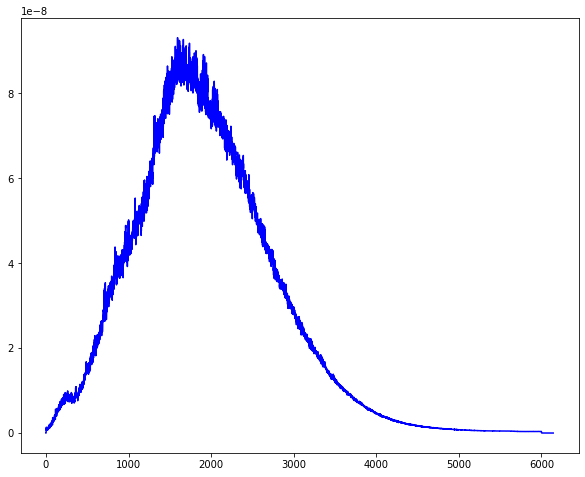

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))

l = np.arange(0 , map_cls.size)

plt.plot(l, l*(l+1)*map_cls/(2*np.pi), 'b')

# plt.xlim([100, 900])
plt.show()

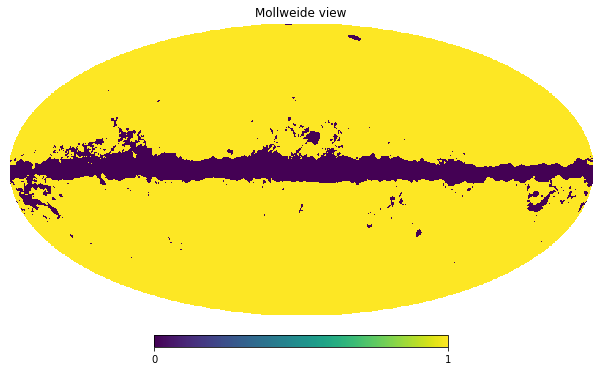

In [7]:
map_mask =hp.read_map(f'{path}COM_CMB_IQU-commander_2048_R3.00_full.fits', field=3)
hp.mollview(map_mask)

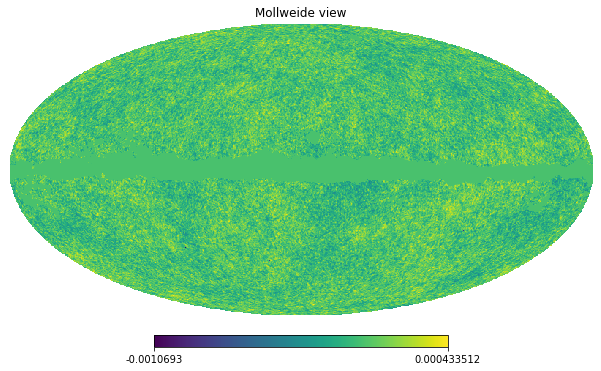

In [8]:
masked_map = map_mask * map_test
hp.mollview(masked_map)

In [6]:
masked_map_cls = hp.anafast(masked_map, map2=None, nspec=None, lmax=None, mmax=None, iter=3, alm=False, 
                                  pol=True, use_weights=False, datapath=None, gal_cut=0, use_pixel_weights=False)


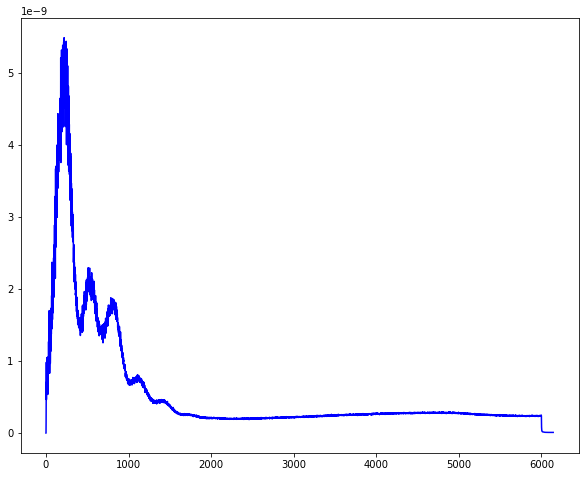

In [7]:
plt.figure(figsize = (10,8))

l = np.arange(0 , masked_map_cls.size)

plt.plot(l, l*(l+1)*masked_map_cls/(2*np.pi), 'b')

# plt.xlim([100, 900])
plt.show()

In [1]:
'''

NOT WORKING


'''


# ##### 2018 #####

# common_settings = {# wich output? ClTT, transfer functions delta_i and theta_i
#                       'output':'tCl,pCl,lCl',
#                       'lensing':'yes',
# #                      'A_lens': 1.,
# #                       LambdaCDM parameters
#                       'h':0.6732,
# #                       'A_lens': 0.14 ,
#                       'omega_b':0.022383,
#                       'omega_cdm':0.12011,
#                       'Omega_k':0,
#                       'ln10^{10}A_s': 3.0448,
#                       #'N_ur' : 3,
#                       'n_s':0.96605,
#                       'z_reio' : 7.68,
#                       #'stat_f_idr' :0.875 ,
#                       'YHe':0.246727,
# #                       'm_ncdm' : [0.06],
#                       # other output and precision parameters
#                       'l_max_scalars':5000}

# M = Class()
# M.set(common_settings)
# M.compute()
# cl_tot = M.raw_cl(2501)
# cl_len = M.lensed_cl(2501)
# ell = cl_tot['ell'][2:]

# factor = ell*(ell+1.)/2./np.pi
# T_cmb=  2.7255e6
# cl_lensed = factor*cl_len['tt'][2:]*T_cmb**2

# C_L = np.loadtxt("COM_PowerSpect_CMB-TT-full_R3.01.txt")
# dls_planck = C_L[:,1]

'\n\nNOT WORKIN\n\n\n'

### Load `.npy` file

In [12]:
ell = np.load("ell_cl.npy")[0]
cls = np.load("ell_cl.npy")[1]

In [14]:


import pylab
plt.figure(figsize = (10,8))
plt.plot(ell, ell*(ell+1)*masked_map_cls[2:2502]*10**12/(2*np.pi), 'k', label = 'commander + mask')
plt.plot(ell, dls_planck[:2500], 'g', label = 'planck data')
plt.plot(ell, cl_lensed, 'b', label = 'theoretical')

plt.xlabel('$\ell$')
plt.ylabel('$D_{\ell}$')
pylab.legend(loc='best')
plt.show()

NameError: name 'masked_map_cls' is not defined

<Figure size 720x576 with 0 Axes>

In [40]:
cl_len['tt'][2:]

NameError: name 'cl_len' is not defined

### Using Planck simulations

In [33]:
map_sim = hp.read_map('/share/storage1/simulations/horizon/cmb-map/dx12_v3_commander_cmb_mc_00000_raw.fits')
sim_cls = hp.anafast(map_sim, map2=None, nspec=None, lmax=None, mmax=None, iter=3, alm=False, 
                                  pol=True, use_weights=False, datapath=None, gal_cut=0, use_pixel_weights=False)


FileNotFoundError: [Errno 2] No such file or directory: '/share/storage1/simulations/horizon/cmb-map/dx12_v3_commander_cmb_mc_00000_raw.fits'

In [34]:

import pylab
plt.figure(figsize = (10,8))
plt.plot(ell, ell*(ell+1)*masked_map_cls[2:2502]*10**12/(2*np.pi), 'ok', label = 'commander + mask')
plt.plot(ell, dls_planck[:2500], 'og', label = 'planck data')
plt.plot(ell, ell*(ell+1)*sim_cls[2:2502]*10**12/(2*np.pi), 'oy', label = 'commander simulation')
plt.plot(ell, cl_lensed, 'ob', label = 'theoretical')

plt.xlabel('$\ell$')
plt.ylabel('$D_{\ell}$')
pylab.legend(loc='best')
plt.show()

NameError: name 'ell' is not defined

<Figure size 720x576 with 0 Axes>

### creating simulation

In [13]:
N = 1
lmax = 2500+1
alm_size = ((lmax*(2*lmax +1 - lmax)/2) + (lmax+1))-3
chi_lm = []
np.random.seed(0)
for i in range(N):
    chi = np.random.normal(loc = 0 ,scale =(1/np.sqrt(2)) ,size =int(alm_size)) + 1j*(np.random.normal(loc= 0 , scale=(1/np.sqrt(2)), size=int(alm_size)))
    chi_lm.append(chi)
chi_lm = np.asarray(chi_lm)    
y_lm = []    
np.random.seed(2)
for i in range(N):
    ylm = np.random.normal(loc = 0 ,scale =(1/np.sqrt(2)) ,size =int(alm_size)) + 1j*(np.random.normal(loc= 0 , scale=(1/np.sqrt(2)), size=int(alm_size)))
    y_lm.append(ylm)
y_lm = np.asarray(y_lm)    

In [14]:
def diagonal_matrice(diag, lmax):
    matrice = []
    ell = np.arange(3,lmax+2)
    for i in range(len(ell)):
        for k in range(ell[i]):
            matrice.append(diag[i])
    return matrice    

#ordering starts from l=0
def order(alm , lmax):
    
    order = []
    for l in range(0 , lmax + 1 , 1):
        for m in range(l+1):
            index = hp.Alm.getidx(lmax, l, m)
            order.append(index)

    tmp = np.zeros(int(alm_size)+3) + np.zeros(int(alm_size)+3)*1j
    for i in range(int(alm_size)+3):
        tmp[order[i]] = alm[i]

    order_aL = np.asarray(tmp)
    order_aL = np.reshape(order_aL, (int(alm_size)+3,))
    im = order_aL[:lmax].imag*0
    re = order_aL[:lmax].real
    tot_L = re + im*1j

    f = []
    ones = lmax
    while (ones != 0):
        for i in range(ones):
            f.append(1)
        f.append(0 + 0*1j)
        ones = ones-1
    f = np.array(f)
    final_mult = np.hstack((f, (0+0*1j)))

    order_alm_fin = np.hstack(( tot_L,  order_aL[(lmax):(int(alm_size)+3)]))
    final_alm = final_mult * order_alm_fin
    return final_alm

In [15]:
c_tt_sqrt = np.sqrt(cl_len['tt'][2:]*T_cmb**2)
matrice_TT = diagonal_matrice(c_tt_sqrt,lmax) 
a_p = matrice_TT * y_lm[0]
a_p = np.hstack((np.zeros(3,dtype=complex),a_p))
final_alm = order(a_p, lmax)

In [16]:
cl_LISW = hp.alm2cl(final_alm ,  lmax=None, mmax=None, lmax_out=None, nspec=None)
cl_LISW.shape

(2502,)

In [15]:

import pylab
plt.figure(figsize = (10,8))
plt.scatter(ell, ell*(ell+1)*cl_LISW[2:]/(2*np.pi), s =0.3, label = 'simulation')
# plt.plot(ell, dls_planck[:2500], 'g', label = 'planck data')
plt.scatter(ell, cl_lensed,s =0.3, label = 'theoretical')

plt.xlabel('$\ell$')
plt.ylabel('$D_{\ell}$')
pylab.legend(loc='best')
plt.savefig('output_plot1.pdf')
plt.show()


NameError: name 'cl_LISW' is not defined

<Figure size 720x576 with 0 Axes>

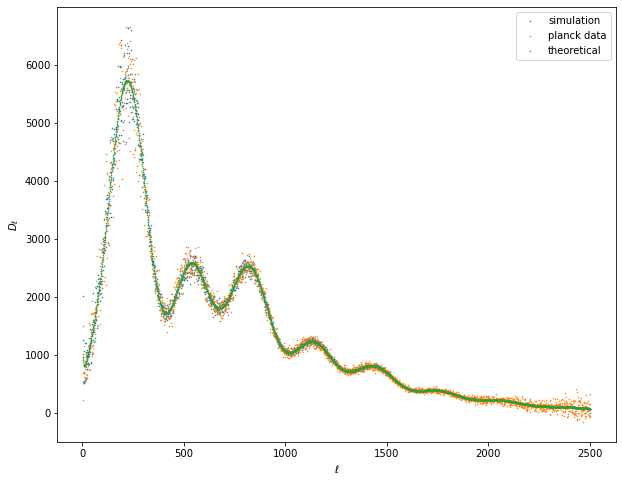

In [24]:

import pylab
plt.figure(figsize = (10,8))
plt.scatter(ell, ell*(ell+1)*cl_LISW[2:]/(2*np.pi),s=0.3, label = 'simulation')
plt.scatter(ell, dls_planck[:2500],s =0.3, label = 'planck data')
plt.scatter(ell, cl_lensed,s =0.3, label = 'theoretical')

plt.xlabel('$\ell$')
plt.ylabel('$D_{\ell}$')
pylab.legend(loc='best')
plt.savefig('output_plot2.pdf')

plt.show()

# Regression Models
We will create a several wais to do regression of the data

## Fake Data

In [7]:
#Inicial fake data
!wget "http://pla.esac.esa.int/pla/aio/product-action?COSMOLOGY.FILE_ID=COM_PowerSpect_CMB-TT-full_R3.01.txt"

--2023-12-19 11:20:29--  http://pla.esac.esa.int/pla/aio/product-action?COSMOLOGY.FILE_ID=COM_PowerSpect_CMB-TT-full_R3.01.txt
Resolvendo pla.esac.esa.int (pla.esac.esa.int)... 193.147.153.153
Conectando-se a pla.esac.esa.int (pla.esac.esa.int)|193.147.153.153|:80... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 
Tamanho: não especificada [application/x-binary]
Salvando em: ‘product-action?COSMOLOGY.FILE_ID=COM_PowerSpect_CMB-TT-full_R3.01.txt’

product-action?COSM     [       <=>          ] 166,55K  82,4KB/s    em 2,0s    

2023-12-19 11:20:32 (82,4 KB/s) - ‘product-action?COSMOLOGY.FILE_ID=COM_PowerSpect_CMB-TT-full_R3.01.txt’ salvo [170547]



In [8]:
df = pd.read_fwf('product-action%3fCOSMOLOGY.FILE_ID=COM_PowerSpect_CMB-TT-full_R3.01.txt')
df.columns = ["id","l", "Dl", "+dDl", "-dDl"]
df.drop('id', axis=1, inplace=True) #droping id Column

In [9]:
#Normalizing Data between 0 and 1 in order to make it easier for the model to learn
df["l"]    = df["l"]/max(df["l"])
df["Dl"]   = df["Dl"]/max(df["Dl"])
df["+dDl"] = df["+dDl"]/max(df["+dDl"])
df["-dDl"] = df["-dDl"]/max(df["-dDl"])

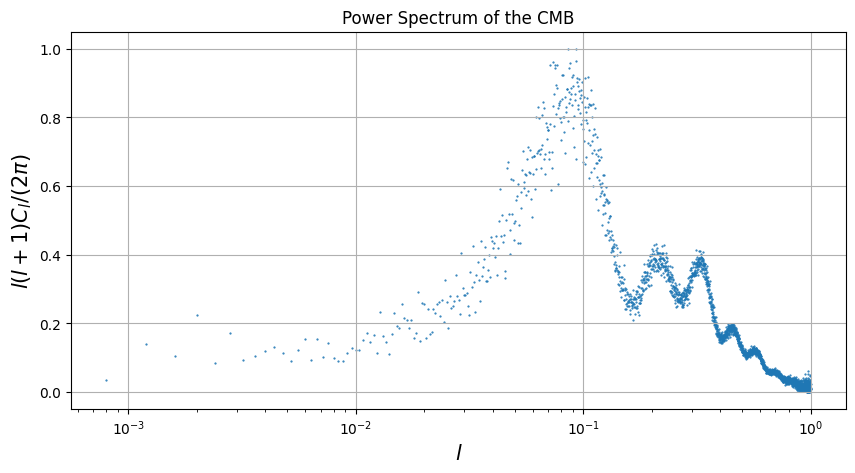

In [11]:
figure(figsize=(10,5),dpi=100)
plt.scatter(df.l,df.Dl,s=0.3)
#plt.errorbar(df.l, df.Dl, df['+dDl'], df['-dDl'], fmt='r^')
plt.xscale('log')
plt.xlabel(r'$l$',size=15)
plt.ylabel(r'$l(l+1)C_l/(2\pi)$',size=15)
plt.title("Power Spectrum of the CMB")
plt.grid()
plt.show()

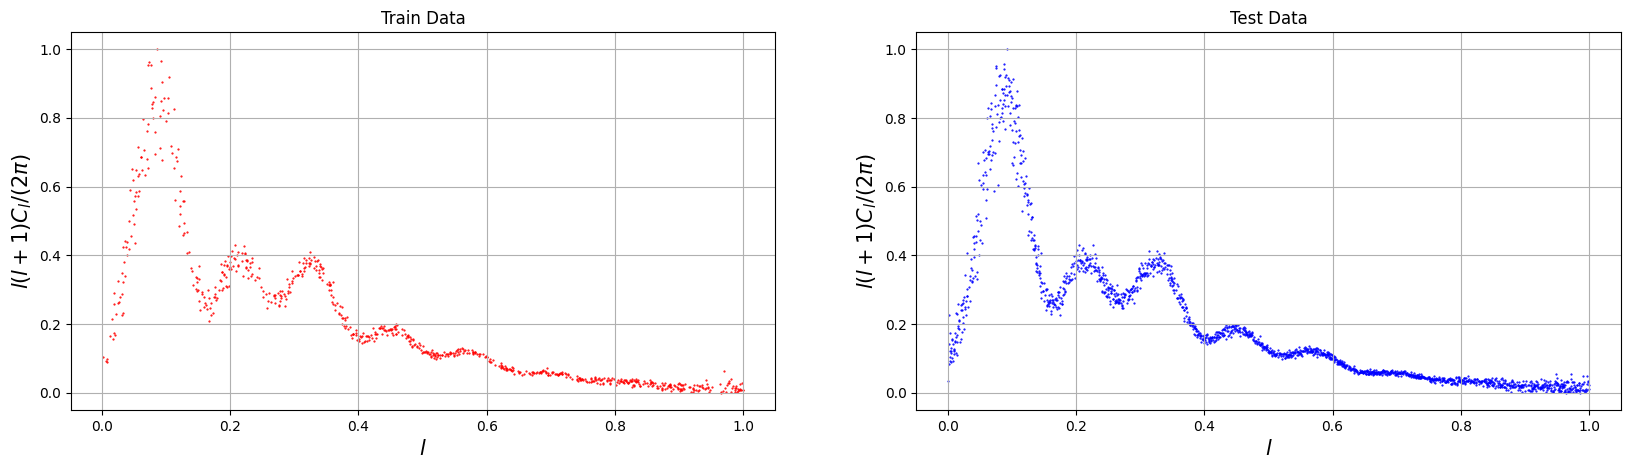

In [12]:
# Spliting in traing and Validation
x_train, x_test, y_train, y_test = train_test_split(df.l, df.Dl, test_size=0.7)
# print(len(x_train))
# print(len(x_test))
figure(figsize=(20,5),dpi=100)

plt.subplot(1,2,1)
plt.scatter(x_train, y_train, color='red',s=0.3)
plt.title('Train Data')
plt.xlabel(r'$l$',size=15)
plt.ylabel(r'$l(l+1)C_l/(2\pi)$',size=15)
plt.grid()
#plt.xscale('log')

plt.subplot(1,2,2)
plt.scatter(x_test, y_test, color='blue',s=0.3)
plt.title('Test Data')
plt.xlabel(r'$l$',size=15)
plt.ylabel(r'$l(l+1)C_l/(2\pi)$',size=15)
plt.grid()
#plt.xscale('log')
plt.show()


## Macine Learning Methods

In [13]:
#Create a regression model for the data using sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

#Split the data into training and testing data
X = df.l.values.reshape(-1,1)
y = df.Dl.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#, random_state=42)
#Polognomial Regression
#Look for the degree with the lowest mean squared error
#The degree with the lowest mean squared error is the best fit
min_mse = 10000000000
best_degree = 0
for degree in range(1, 100):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly =  poly.fit_transform(X_test)
    reg = LinearRegression()
    reg.fit(X_train_poly, y_train)
    y_pred = reg.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    if mse < min_mse:
        min_mse = mse
        best_degree = degree
print('Best degree: ', best_degree)
print('Min MSE: ', min_mse)


Best degree:  91
Min MSE:  0.0008451391935203801


In [14]:

#Plot the best fit
degree = best_degree
#degree = 100
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly =  poly.fit_transform(X_test)
reg = LinearRegression()
reg.fit(X_train_poly, y_train)
y_pred = reg.predict(X_test_poly)
print('Coefficients: \n', reg.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [[-3.10569374e+08 -2.24399194e+00  7.82469153e+02 -2.56171439e+04
   2.57212757e+05  7.72368427e+06 -2.80125756e+08  4.08119192e+09
  -3.49774095e+10  1.95058514e+11 -7.31609119e+11  1.82799061e+12
  -2.82976790e+12  2.00741945e+12  9.45853378e+11 -2.37094125e+12
  -3.22515138e+11  2.09946691e+12  7.18872772e+11 -1.39572250e+12
  -1.58849347e+12  2.42164544e+11  1.51130122e+12  1.35212117e+12
  -2.68568838e+11 -1.51944140e+12 -1.25901731e+12 -2.27717012e+11
   9.91671078e+11  1.41459348e+12  7.75983840e+11  1.16314817e+10
  -8.92200053e+11 -1.26677117e+12 -9.51176326e+11 -1.69637901e+11
   6.69808161e+11  1.18197891e+12  9.88529290e+11  5.56155840e+11
  -8.63937400e+10 -6.51099409e+11 -1.03229921e+12 -9.73721937e+11
  -5.76238175e+11 -3.73814087e+10  4.99106489e+11  8.94978018e+11
   1.01826578e+12  7.31450746e+11  3.79740150e+11 -3.16980865e+11
  -6.56959210e+11 -8.77376809e+11 -7.74427947e+11 -6.62815728e+11
  -2.68544331e+11  2.28117150e+11  5.58674597e+11  8.1536012

In [15]:
x_points = np.linspace(X_test_poly.min(), X_test_poly.max(), 5000)

#Reshape x_points like X_test_poly
x_points = x_points.reshape(-1,1)
x_points_poly = poly.fit_transform(x_points)
y_points = reg.predict(x_points_poly)

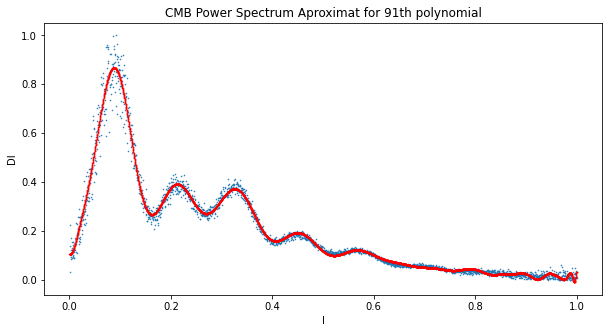

In [19]:
#Plot the regression model
plt.figure(figsize=(10,5))
plt.scatter(X, y, s=0.3)
#plt.scatter(X_test, y_pred, color='r',s=1)
plt.scatter(x_points, y_points, color='r',s=.3)
plt.xlabel('l')
plt.ylabel('Dl')
#plt.xscale('log')   
plt.title(f'CMB Power Spectrum Aproximat for {degree}th polynomial')
plt.show()


## Deep Lerning Models

### Exemple 1: Simple Netework

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x_values = df.l.values
y_values = df.Dl.values

data = pd.DataFrame({'x': x_values, 'y': y_values})

# Convert the DataFrame to PyTorch tensors
x_tensor = torch.tensor(data['x'].values, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(data['y'].values, dtype=torch.float32).view(-1, 1)

In [22]:


# Define the MLP model
class MLPRegressor(nn.Module):
    def __init__(self, input_size, hidden_layer_sizes):
        super(MLPRegressor, self).__init__()
        layers = [nn.Linear(input_size, hidden_layer_sizes[0]), nn.ReLU()]
        for i in range(len(hidden_layer_sizes) - 1):
            layers.append(nn.Linear(hidden_layer_sizes[i], hidden_layer_sizes[i+1]))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_layer_sizes[-1], 1))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Initialize the model, loss function, and optimizer
model = MLPRegressor(input_size=1, hidden_layer_sizes=[10, 20,30,40, 30,20,10])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [23]:

# Training loop function
def training_loop(n_epochs, optimizer, model, loss_fn, x_train, y_train):
    for epoch in range(1, n_epochs + 1):
        y_pred = model(x_train)
        loss = loss_fn(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")



In [24]:
# Train the model
training_loop(
    n_epochs=10000,
    optimizer=optimizer,
    model=model,
    loss_fn=criterion,
    x_train=x_tensor,
    y_train=y_tensor
)

Epoch 1, Loss: 0.28068339824676514
Epoch 1000, Loss: 0.00097664596978575
Epoch 2000, Loss: 0.0009728495497256517
Epoch 3000, Loss: 0.0008200426236726344
Epoch 4000, Loss: 0.0007065176032483578
Epoch 5000, Loss: 0.0007315364200621843
Epoch 6000, Loss: 0.0007269262569025159
Epoch 7000, Loss: 0.0007058443734422326
Epoch 8000, Loss: 0.0007118398207239807
Epoch 9000, Loss: 0.0007097399211488664
Epoch 10000, Loss: 0.0007070830906741321


In [25]:
# Plot the original data and the model's predictions
with torch.no_grad():
    predicted = model(x_tensor).numpy()


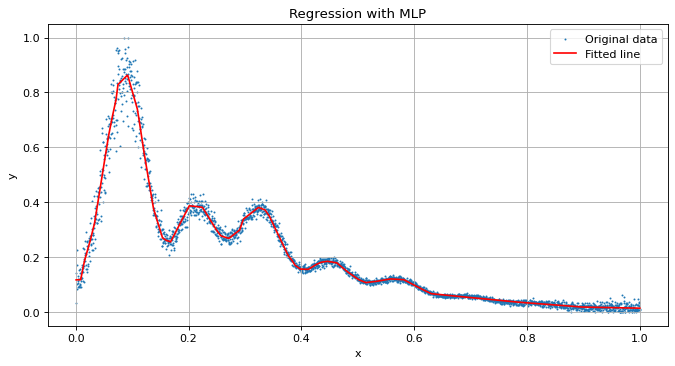

In [26]:
figure(figsize=(10,5),dpi=80)
plt.scatter(x_tensor.numpy(), y_tensor.numpy(), label='Original data',s=0.6)
plt.plot(x_tensor.numpy(), predicted, label='Fitted line', color='red')
plt.title('Regression with MLP')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
